In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
import dash
#import dash_core_components as dcc
from dash import dcc
from dash.dependencies import Input, Output
import mlflow.sklearn
#import dash_html_components as html
from dash import html
import plotly.express as px

%matplotlib inline


## About The Data

A company's HR department wants to predict whether some customers would leave the company in next 2 years. The goal is to build a predictive model that predicts the prospects of future and present employeeS leaving or not leaving the company. The data is from [kaggle.com](https://www.kaggle.com/tejashvi14/employee-future-prediction?select=Employee.csv).

## Questions
The project will answer and address the following issues:

1. How many employees have left the company so far?
2. Which group of employees have the tendency to leave most?
3. Build a predictive model that predicts the prospects of the present and future employees.


### Cross-Industry Standard Process for Data Management (CRISP-DM)
The following are performed in the project using CRISP-DM:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

In [13]:
# Load the data

df = pd.read_csv('data/Employee.csv')

### Business Understanding
The HR has identified and curated data from employees using nine criteria, namely:

    1. Education
    2. The year of joining the company (JoiningYear)
    3. City of the employees
    4. Payment Tier
    5. Age of employees.
    6. Gender of employees
    7. Whether or not an employee was ever benched (EverBenched)
    8. Experience in current domain
    9. Whether the employee leaves the company or not (LeaveOrNot) - the goal of this project


In [3]:
# Data Understanding
df.head()
#print(type(df['LeaveOrNot'][0]))
print(f"The number of rows in the dataset is {df.shape[0]}")
print(f"The number of columns in the dataset is {df.shape[1]}")
df['LeaveOrNot'].value_counts(dropna=False)
df1 = df.dropna(how='any')
print(f"There are {df.shape[0] - df1.shape[0]} rows of missing values in the dataset")
df['LeaveOrNot'].value_counts(dropna=False)
x = df['LeaveOrNot'][0]
#print(type(x))

df.iloc[:, 8].value_counts()


The number of rows in the dataset is 4653
The number of columns in the dataset is 9
There are 0 rows of missing values in the dataset


0    3053
1    1600
Name: LeaveOrNot, dtype: int64

In [4]:
1600/4653

0.3438641736514077

PaymentTier  LeaveOrNot
3            1             961
2            1             550
1            1              89
dtype: int64
JoiningYear  LeaveOrNot
2018         1             362
2015         1             318
2017         1             297
2013         1             224
2014         1             173
2016         1             117
2012         1             109
dtype: int64


<AxesSubplot:title={'center':'Employees by Year of Joining and Education Degree Type'}, xlabel='JoiningYear,LeaveOrNot', ylabel='employees'>

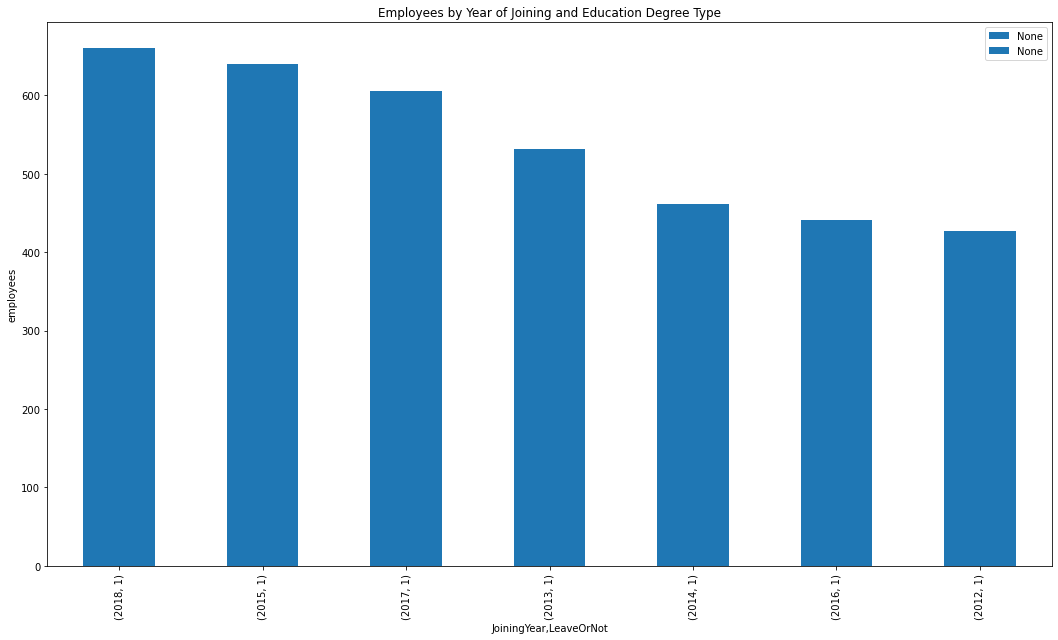

In [5]:
df_edu = df.reset_index().melt(id_vars='JoiningYear', value_vars= 'Education', value_name= 'Degree')
data = df_edu[['JoiningYear', 'Degree']]

#sns.barplot(data=df_edu, x='JoiningYear', y='Degree', hue='Degree')
df.groupby(['Education']).count()#['JoiningYear']
#print(type(data.value_counts()))
#print(data.value_counts())
y = (data.iloc[:,1:] == "Bachelors" ).sum().values
#z = (df.iloc[:,4:] == 0).sum().values
x = data.value_counts()
a = df[['JoiningYear', 'LeaveOrNot']]#.value_counts()
a1 = a[a.iloc[:,1]==1].value_counts()
b = df[['PaymentTier', 'LeaveOrNot']]
b1 = b[b.iloc[:,1]==1].value_counts()
print(b1)
print(a1)
x.plot(kind="bar", figsize=(18,10), legend=True, ylabel = "employees", title="Employees by Year of Joining and Education Degree Type")

a1.plot(kind="bar", figsize=(18,10), legend=True, ylabel = "employees", title="Employees by Year of Joining and Education Degree Type")

In [6]:
df[['EverBenched', 'LeaveOrNot']][df.iloc[:,8]==1].value_counts()

EverBenched  LeaveOrNot
No           1             1383
Yes          1              217
dtype: int64

In [7]:
e=df[['ExperienceInCurrentDomain', 'LeaveOrNot']][df.iloc[:,8]==1].value_counts()
print("Payment Tier")
print(df[['PaymentTier', 'LeaveOrNot']][df.iloc[:,8]==1].value_counts())
print(df[['Age', 'LeaveOrNot']][df.iloc[:,8]==1].value_counts())
print(e)
print(df[['City', 'LeaveOrNot']][df.iloc[:,8]==1].value_counts())

Payment Tier
PaymentTier  LeaveOrNot
3            1             961
2            1             550
1            1              89
dtype: int64
Age  LeaveOrNot
27   1             226
26   1             223
28   1             186
25   1             176
24   1             153
30   1              77
29   1              75
32   1              54
35   1              45
36   1              45
37   1              43
34   1              42
40   1              41
33   1              40
38   1              40
39   1              39
31   1              37
41   1              23
22   1              19
23   1              16
dtype: int64
ExperienceInCurrentDomain  LeaveOrNot
2                          1             399
3                          1             299
4                          1             297
5                          1             288
1                          1             188
0                          1             124
7                          1               3
6              

In [8]:
print(df['PaymentTier'].value_counts()/df.shape[0])

pt= df['PaymentTier'].value_counts()

ptl = df[['PaymentTier','LeaveOrNot', ]][df.iloc[:,8]==1].value_counts()
num_left = df['LeaveOrNot'][df.iloc[:,8]==1].shape[0]
print(pt)
print(ptl)
print(ptl/num_left)

3    0.750484
2    0.197292
1    0.052224
Name: PaymentTier, dtype: float64
3    3492
2     918
1     243
Name: PaymentTier, dtype: int64
PaymentTier  LeaveOrNot
3            1             961
2            1             550
1            1              89
dtype: int64
PaymentTier  LeaveOrNot
3            1             0.600625
2            1             0.343750
1            1             0.055625
dtype: float64


In [9]:
df_leave = df.query('LeaveOrNot==1')
df_leave
num_of_left_employees = (df_leave.shape[0])
df_leave_f = df_leave.query("Gender=='Female'")
df_leave_f = df_leave_f.Gender
df_leave_f 
df_leave_m = df_leave.query("Gender=='Male'").Gender
df_leave_m.value_counts()/1600

labels = df.columns[:-1]
new = []
original = []
for label in labels:
    elem = df_leave[label].value_counts()/num_of_left_employees
    indiv = df[label].value_counts()/df.shape[0]
    new.append(elem)
    original.append(indiv)
change = [(a-b)*100 for a, b in zip(np.array(new, dtype='object'), np.array(original, dtype='object'))]
change

[Bachelors   -6.828431
 Masters      7.862911
 PHD         -1.034480
 Name: Education, dtype: float64,
 2012    -4.019221
 2013    -0.377821
 2014    -4.210066
 2015     3.090130
 2016    -3.970543
 2017    -5.250094
 2018    14.737616
 Name: JoiningYear, dtype: float64,
 Bangalore   -10.695586
 New Delhi    -1.990678
 Pune         12.686264
 Name: City, dtype: float64,
 3   -14.985856
 2    14.645793
 1     0.340063
 Name: PaymentTier, dtype: float64,
 22    0.134416
 23   -0.031593
 24    1.288268
 25    2.016548
 26    0.075475
 27    0.692806
 28   -1.914652
 29   -0.255547
 30    0.084368
 31   -0.373939
 32    0.538121
 33   -0.164947
 34   -0.297845
 35    0.169044
 36   -0.174820
 37   -0.342803
 38   -0.422845
 39   -0.377888
 40   -0.317362
 41   -0.324804
 Name: Age, dtype: float64,
 Female    14.953417
 Male     -14.953417
 Name: Gender, dtype: float64,
 No    -3.289558
 Yes    3.289558
 Name: EverBenched, dtype: float64,
 0    0.120514
 1   -0.242263
 2    1.576228
 3    1

In [10]:
df[['Education', 'LeaveOrNot']].value_counts(ascending=False)

Education  LeaveOrNot
Bachelors  0             2472
           1             1129
Masters    0              447
           1              426
PHD        0              134
           1               45
dtype: int64

In [11]:
def load_data(filepath):
    """
    A function that loads and returns a dataframe.
    INPUT:
        filepath: relative or absolute path to the data
    RETURNS:
        df: Dataframe
    """
    df = pd.read_csv(filepath)
    return df

def business_understanding(dataframe):
    """
    A procedure to understand the business goal of the data.
    Prints the columns of the dataframe
    INPUT:
        dataframe: The data's dataframe to be understood
    RETURNS:
        None
    """
    columns = dataframe.columns
    print("The HR has identified and curated data from employees using nine criteria, namely:")
    for i, col in enumerate(columns):
        print(f"{i+1}. {col} ")
        
def data_cleaning_and_understanding(dataframe):
    """
    This procedure analyses the dataframe to answer the following questions:
        1. How many employees have left the company so far?
        2. Which group of employees have the tendency to leave most?
        3. Find other details about the data
        
        In particlar, this function analyzes the percentage change of each sub-group in every columns 
        between the original dataframe and the new dataframe involving employees that have left
        
        INPUT:
            dataframe- original dataframe
        OUTPUT:
            two series: dataframes with the column of the group of employees that are most likely to leave 
            their employments from both the original dataframe and the dataframe containing only those 
            that have left their employment
    """
    df = dataframe
    num_employees = df.shape[0]
    num_of_valid_employees = df.dropna(how="any").shape[0]
    num_of_missing_employees = df.shape[0] - num_of_valid_employees
    df_of_left_employees = df.query('LeaveOrNot==1')
    num_of_left_employees = df_of_left_employees.shape[0]
    # Get all the columns except the "LeaveOrNot"
    labels = df.columns[:-1]
    
    # Search for Group with the most tendency to leave their employment
    new = []
    original = []
    for label in labels:
        elem = df_of_left_employees[label].value_counts()/num_of_left_employees
        indiv = df[label].value_counts()/df.shape[0]
        new.append(elem)
        original.append(indiv)
    percent_change = [(a-b)*100 for a, b in zip(np.array(new, dtype='object'), np.array(original, dtype='object'))]
    print('='*60)
    if num_of_missing_employees != 0:
        print(f"The dataset contains {num_of_valid_employees } valid employees.")
    else:
        print(f"The dataset contains {num_employees } number of employees.")
    print('='*60)
    
    print(f"{num_of_left_employees} employees have so far left the company")
    
    print('='*60)
    
    for x in percent_change:
        print(x)
        print('='*60)
    
    # This the group with the most tendency to leave their employment would be observed from the last printout above
    # The group with most percentage change is "Female" employees
    df_most_left_new = df_of_left_employees['Gender']
    df_most_left_original = df['Gender']
    
    return df_most_left_original, df_most_left_new
    
    
def plot_results(df):
    
    """
        A procedeure to plot the components of the column with the most tendency to leave before and after 
        those that left their employments
        
        INPUTS:
            df : Dataframe, df_before or df_after containing only the column of the group with the most tendency to 
            leave their employments
            
        RETURNS:
            None
            
    """
        
    data_plot1 = df.value_counts()
    data_plot1.plot(kind="bar", figsize=(18,10),  ylabel = "employees", title="Employees by Gender for those that left or on the original data")
        #return None

In [12]:
# Data Preparation


def create_dummy_df(df, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    cat_df = df.select_dtypes(include=['object']) 
    #Create a copy of the dataframe


    #Pull a list of the column names of the categorical variables
    cat_cols = cat_df.columns
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue

    return df



In [13]:
def pipeline(df):
    """
    A function to train a model using XGBoostClassifier.
    
    INPUT:
        df - data_frame with dummy variables in place of categorical variables
    OUTPUTS:
        X_test - X_test  
        y_test - y_test
        model  - trained model
    """
    X = df.drop('LeaveOrNot', axis=1)
    Y = df['LeaveOrNot']
    
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15)    
    
    # Define the model 
    
    model = XGBClassifier(
        max_depth=4,
        learning_rate=0.24110220656695125,
        n_estimators=118,
        gamma=0.6817067483571848,
        eval_metric="error",
        use_label_encoder=False
        ).fit(X_train,y_train)
    
    return X_test, y_test, model

def evaluate_model(X_test, y_test, model):
    """
    Evaluates the model by displaying the precision, recall, f1_score, and accuracy of the model
    INPUTS:
        X_test, y_test, model
    OUTPUTS:
        None
    
    """
    y_true = model.predict(X_test)
    print('='*50)
    print(classification_report(y_test, y_true))
    print('='*50)
    print(f"The accuracy of the model is:  {accuracy_score(y_test, y_true)*100}")

In [14]:
# load the data
filepath = 'v'
df = load_data(filepath)

In [15]:
# Business Understanding 
business_understanding(df)

The HR has identified and curated data from employees using nine criteria, namely:
1. Education 
2. JoiningYear 
3. City 
4. PaymentTier 
5. Age 
6. Gender 
7. EverBenched 
8. ExperienceInCurrentDomain 
9. LeaveOrNot 


In [16]:
# Data Understaing 

df_before, df_after = data_cleaning_and_understanding(df)

The dataset contains 4653 number of employees.
1600 employees have so far left the company
Bachelors   -6.828431
Masters      7.862911
PHD         -1.034480
Name: Education, dtype: float64
2012    -4.019221
2013    -0.377821
2014    -4.210066
2015     3.090130
2016    -3.970543
2017    -5.250094
2018    14.737616
Name: JoiningYear, dtype: float64
Bangalore   -10.695586
New Delhi    -1.990678
Pune         12.686264
Name: City, dtype: float64
3   -14.985856
2    14.645793
1     0.340063
Name: PaymentTier, dtype: float64
22    0.134416
23   -0.031593
24    1.288268
25    2.016548
26    0.075475
27    0.692806
28   -1.914652
29   -0.255547
30    0.084368
31   -0.373939
32    0.538121
33   -0.164947
34   -0.297845
35    0.169044
36   -0.174820
37   -0.342803
38   -0.422845
39   -0.377888
40   -0.317362
41   -0.324804
Name: Age, dtype: float64
Female    14.953417
Male     -14.953417
Name: Gender, dtype: float64
No    -3.289558
Yes    3.289558
Name: EverBenched, dtype: float64
0    0.120514
1

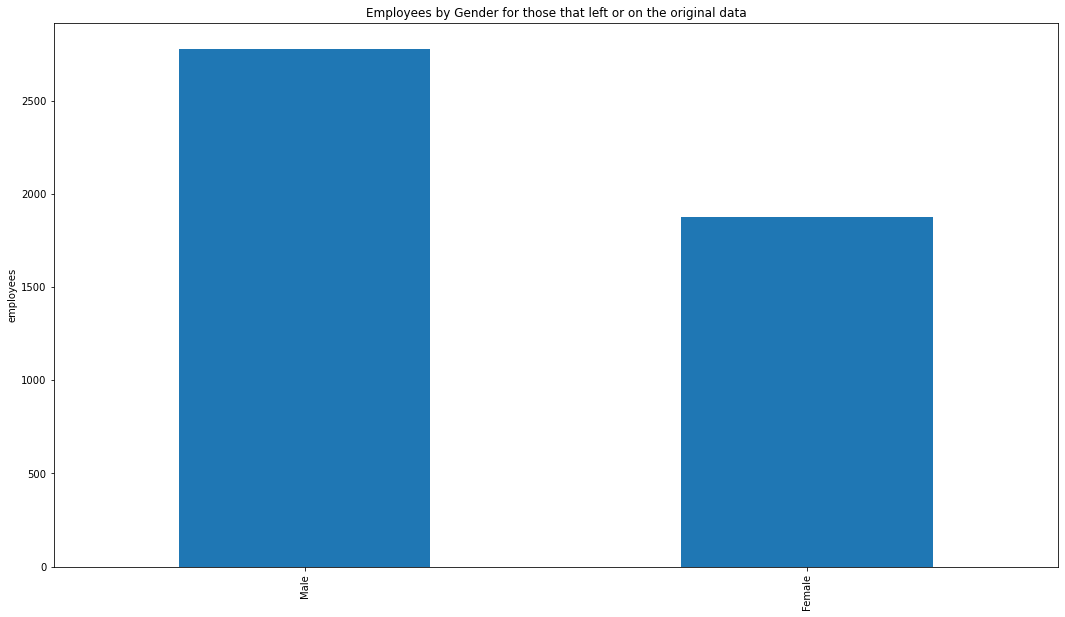

In [17]:
# Ploting the Results
# Gender Distribution on the original dataset
plot_results(df_before)

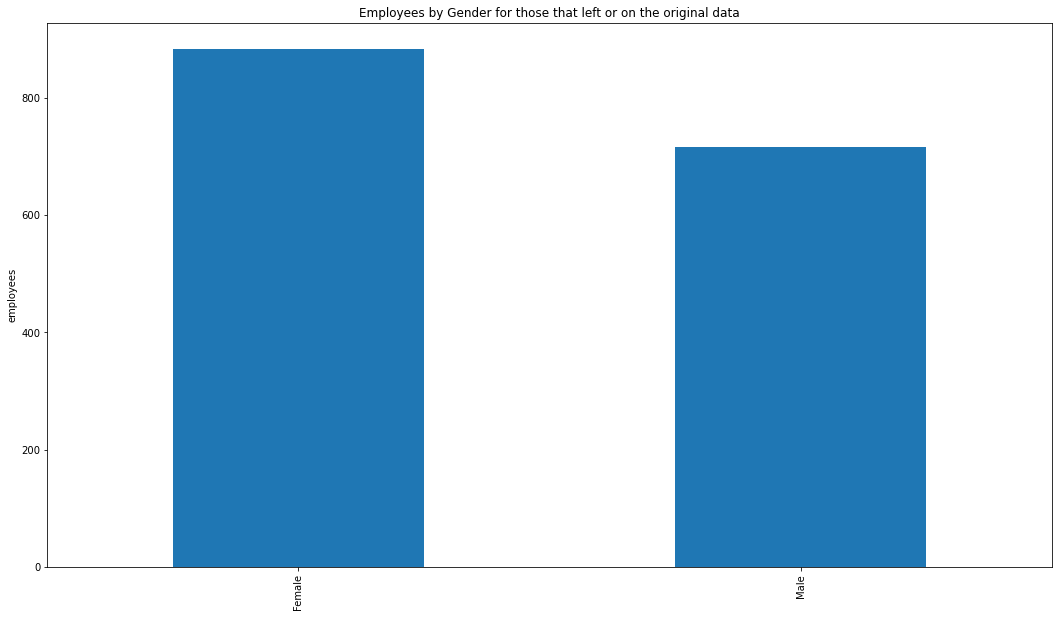

In [18]:
# Ploting the Results
# Gender Distribution on the dataframe of those that left
plot_results(df_after)

In [19]:

df1= create_dummy_df(df, dummy_na=False)
df1.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,2017,3,34,0,0,0,0,0,0,1,0
1,2013,1,28,3,1,0,0,0,1,0,0
2,2014,3,38,2,0,0,0,1,0,0,0
3,2016,3,27,5,1,1,0,0,0,1,0
4,2017,3,24,2,1,1,0,0,1,1,1


In [20]:
%%time
#Converting the dataframe into XGBoost’s Dmatrix object
dtrain = xgb.DMatrix(df1.drop('LeaveOrNot', axis=1), label=df1['LeaveOrNot'])

#Bayesian Optimization function for xgboost
#specify the parameters you want to tune as keyword arguments
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
    
    
    params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'eval_metric': 'rmse'}
    #Cross validating with the specified parameters in 5 folds and 70 iterations
    cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
    #Return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(100,120)
                                            })

#performing Bayesian optimization for 5 iterations with 8 steps of random exploration with an #acquisition function of expected improvement
xgb_bo.maximize(n_iter=5, init_points=8, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
[14:02:31] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:02:31] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:02:31] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, 

|  5        | -0.3429   |  0.6558   |  0.5288   |  4.489    |  107.8    |
[14:02:44] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:02:44] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:02:44] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mi

|  10       | -0.3544   |  0.8381   |  0.8407   |  9.876    |  119.2    |
[14:03:01] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:03:01] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:03:01] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mi

In [21]:
%%time
#Extracting the best parameters
params = xgb_bo.max['params']
print(params)

{'gamma': 0.9299932975620071, 'learning_rate': 0.4110072984097317, 'max_depth': 9.243284742626656, 'n_estimators': 113.01655275597003}
CPU times: user 1.49 ms, sys: 68 µs, total: 1.56 ms
Wall time: 787 µs


In [22]:
X = df1.drop('LeaveOrNot', axis=1)
Y = df1['LeaveOrNot']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15)

In [23]:
%%time
classifier1 = XGBClassifier(
        max_depth=4,
        learning_rate=0.24110220656695125,
        n_estimators=118,
        gamma=0.6817067483571848,
        eval_metric="error",
        use_label_encoder=False
        ).fit(X_train,y_train)

CPU times: user 1.85 s, sys: 57.3 ms, total: 1.9 s
Wall time: 535 ms


In [24]:
%%time

classifier3 = XGBClassifier(
        max_depth=6,
        learning_rate=0.07621628225693478,
        n_estimators=113,
        gamma=0.13769849632323283,
        eval_metric="error",
        use_label_encoder=False
        ).fit(X_train,y_train)

CPU times: user 1.96 s, sys: 83.6 ms, total: 2.04 s
Wall time: 542 ms


In [25]:
%%time
classifier2 = XGBClassifier(
        max_depth=7,
        learning_rate=0.05779971444864085,
        n_estimators=114,
        gamma=0.4325247676410241,
        eval_metric="error",
        use_label_encoder=False
        ).fit(X_train,y_train)

CPU times: user 2.18 s, sys: 72.2 ms, total: 2.25 s
Wall time: 591 ms


In [26]:
y_pred1 = classifier1.predict(X_test)

In [27]:
y_pred = classifier2.predict(X_test)

In [28]:
y_pred2 = classifier3.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       483
           1       0.87      0.66      0.75       215

    accuracy                           0.87       698
   macro avg       0.87      0.81      0.83       698
weighted avg       0.87      0.87      0.86       698



In [30]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       483
           1       0.88      0.67      0.76       215

    accuracy                           0.87       698
   macro avg       0.87      0.81      0.83       698
weighted avg       0.87      0.87      0.86       698



In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       483
           1       0.88      0.64      0.74       215

    accuracy                           0.86       698
   macro avg       0.87      0.80      0.83       698
weighted avg       0.87      0.86      0.86       698



In [32]:
print(accuracy_score(y_test, y_pred))

0.8638968481375359


In [33]:
print(accuracy_score(y_test, y_pred1))

0.8653295128939829


In [34]:
print(np.mean(cross_val_score(classifier2, X_train, y_train, cv=3, scoring='roc_auc')))

0.866490224865029


In [35]:
print(np.mean(cross_val_score(classifier1, X_train, y_train, cv=3, scoring='roc_auc')))

0.8678269962234446


In [36]:

%%time

# save the model

model_path = "model/employee_classifier"
#mlflow.sklearn.save_model(classifier1, model_path)

# Load the model
loaded_model = mlflow.sklearn.load_model(model_path)

CPU times: user 14.5 ms, sys: 0 ns, total: 14.5 ms
Wall time: 25 ms


In [37]:
y_new = loaded_model.predict(X_test)
y_new
X_test.head(10)#.iloc[:, 1]

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
2117,2016,3,26,4,0,0,0,1,1,0
1373,2012,3,27,5,0,0,1,0,1,0
799,2013,3,24,2,0,0,0,0,1,0
2199,2015,3,29,2,0,1,0,0,1,0
3022,2013,3,36,4,0,0,0,0,1,0
2354,2017,2,26,4,1,0,1,0,0,1
1364,2013,3,25,3,0,0,1,0,0,0
569,2016,3,26,4,0,0,0,0,1,0
2195,2013,3,26,4,0,0,1,0,0,0
3315,2015,3,39,3,0,0,0,0,0,0


In [38]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [39]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [40]:
df['ExperienceInCurrentDomain'].value_counts()

2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: ExperienceInCurrentDomain, dtype: int64

In [41]:
new_row = {
        
        "JoiningYear": 2017,
        "PaymentTier": 2,
        "Age": 26,
        "ExperienceInCurrentDomain": 4,
        "Education_Masters" : 0,
        "Education_PHD":  0,
        "City_New Delhi": 1,
        "City_Pune": 0 ,
        "Gender_Male":  0 ,
        "EverBenched_Yes": 1
    }
    
new_df = pd.DataFrame.from_dict(new_row, orient="index").transpose()
new_df1 = pd.DataFrame.from_dict(new_row, orient="index")
#print(new_df)
#print(new_df1)
new_df.head() 

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,2017,2,26,4,0,0,1,0,0,1


In [42]:
d = df[['Gender', 'Education', 'Age']].head(20)
d.head()

,Gender,Education,Age
0,Male,Bachelors,34
1,Female,Bachelors,28
2,Female,Bachelors,38
3,Male,Masters,27
4,Male,Masters,24


In [43]:
df['Gender'][df['Gender']=="Female"].count()

1875

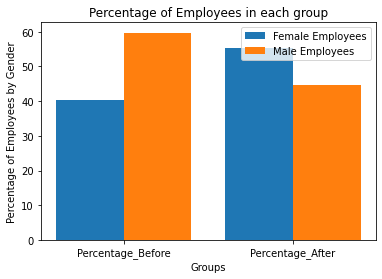

In [44]:
X = ["Percentage_Before", "Percentage_After"]
Females = [40.3, 55.25 ]
Males = [59.7, 44.75]


X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Females, 0.4, label = 'Female Employees')
plt.bar(X_axis + 0.2, Males, 0.4, label = 'Male Employees')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Percentage of Employees by Gender")
plt.title("Percentage of Employees in each group")
plt.legend()
plt.show()

In [45]:
def visualize_results(df):
    
    """
        A procedeure to plot the components of the column with the most tendency to leave before and after 
        those that left their employments
        
        INPUTS:
            df : Dataframe, df_before or df_after containing only the column of the group with the most tendency to 
            leave their employments
            
        RETURNS:
            None
            
    """
    df_left = df.query('LeaveOrNot==1')
    females_before = df['Gender'][df['Gender']=="Female"].count()
    males_before = df['Gender'][df['Gender']=="Male"].count()
    females_after = df_left['Gender'][df_left['Gender']=="Female"].count()
    males_after = df_left['Gender'][df_left['Gender']=="Male"].count()
    
    percent_of_females_before =   females_before*100/df.shape[0]
    percent_of_males_before   =   males_before*100/df.shape[0]
    
    percent_of_females_after  =   females_after*100/df_left.shape[0]
    percent_of_males_after    =   males_after*100/df_left.shape[0]
    X = ["Before_Resignation", "After_Resignation"]
    
    Females = [percent_of_females_before, percent_of_females_after]
    Males   = [percent_of_males_before, percent_of_males_after]
    
    X_axis = np.arange(len(X))
  
    plt.bar(X_axis - 0.2, Females, 0.4, label = 'Female Employees')
    plt.bar(X_axis + 0.2, Males, 0.4, label = 'Male Employees')
  
    plt.xticks(X_axis, X)
    plt.xlabel("Gender")
    plt.ylabel("Percentage of Employees by Gender")
    plt.title("Percentage of Employees in each group")
    plt.legend()
    plt.show()

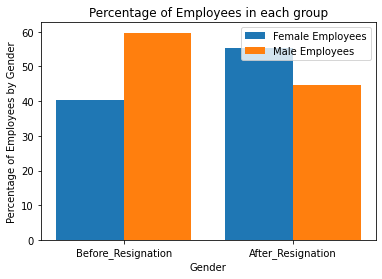

In [46]:
visualize_results(df)

In [48]:
%tb
# Deploying the model using Dash App
import socket
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)

app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children='Model UI'),
    
    html.H3(children='PaymentTier: (1, 2 or 3) ::: Age: (20 - 60) :::  ExperienceInCurrentDomain: (0, 1, 2, 3, 4, 5, 6 or 7)'),
    
    html.Div([
        html.Label('JoiningYear'),
        dcc.Input(value='2017', type ='int', id='yr'),
    ]),
    
    html.Div([
        html.Label('PaymentTier:'),
        dcc.Input(value='2', type ='int', id='level'),
    ]),
    html.Div([
        html.Label('Age:'),
        dcc.Input(value='25', type ='int', id='age'),
    ]),
    html.Div([
        html.Label('ExperienceInCurrentDomain:'),
        dcc.Input(value='3', type ='int', id='exp'),
    ]),
    html.P([
        html.Label('Prediction'),
        dcc.Input(value='0', type ='text', id='pred'),
    ]),
])


# Callback

@app.callback(

    Output(component_id="pred", component_property="value"),
    [
     Input(component_id="yr", component_property="value"),
     Input(component_id="level", component_property="value"),
     Input(component_id="age", component_property="value"),
     Input(component_id="exp", component_property="value")
    
    ]
)



def update_prediction( year, level,age, exp):
    new_row = {
        
        "JoiningYear": year,
        "PaymentTier": level,
        "Age": age,
        "ExperienceInCurrentDomain": exp,
        "Education_Masters" : 0,
        "Education_PHD":  0,
        "City_New Delhi": 0,
        "City_Pune": 1 ,
        "Gender_Male":  1 ,
        "EverBenched_Yes": 0
    }
    
    new_df = pd.DataFrame.from_dict(new_row, orient="index").transpose()
    
    
    
    return str(loaded_model.predict(new_df)[0])
    
    


if __name__=='__main__':
    app.run_server(debug=True)
    #app.run_server(host='0.0.0.0', Debug=True)

SystemExit: 1

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: [Errno 98] Address already in use